In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/state_DC-MD-VA.csv'
capstone_data = pd.read_csv(file_path)

<ipython-input-2-d29fe0d68894>:2: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  capstone_data = pd.read_csv(file_path)


#### List of proposed models

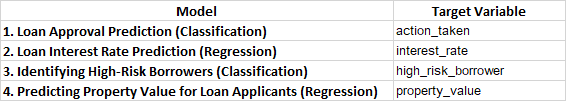

#### Dropping lein, state and county code since they are purely used as identifiers in the dataset

In [ ]:
capstone_data.drop(columns=['lei','activity_year','state_code','county_code'], inplace=True)

In [ ]:
capstone_data.head()

,derived_msa-md,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,12580,2.451027e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,2,...,NaN,NaN,NaN,3451,29.04,121700,132.95,752,595,62
1,49020,5.106905e+10,C,FSA/RHS:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,2,...,NaN,NaN,NaN,7547,41.91,99900,82.41,1480,2094,27
2,15680,2.403788e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,2,...,NaN,NaN,NaN,7514,26.48,142600,110.50,1863,2411,14
3,12580,2.400541e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,2,...,NaN,NaN,NaN,6095,10.98,121700,146.25,1974,2310,39
4,47894,5.101310e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,2,...,NaN,NaN,NaN,1912,58.42,150100,123.07,560,355,53


#### Dropping Race, ethnicity, and Sex related columns

In [ ]:
drop_keywords = ["race", "ethnicity", "sex"]
columns_to_drop = [col for col in capstone_data.columns if any(keyword in col.lower() for keyword in drop_keywords)]
capstone_data.drop(columns=columns_to_drop, inplace=True)

print("Dropped columns:", columns_to_drop)

Dropped columns: ['derived_ethnicity', 'derived_race', 'derived_sex', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'co-applicant_ethnicity-1', 'co-applicant_ethnicity-2', 'co-applicant_ethnicity-3', 'co-applicant_ethnicity-4', 'co-applicant_ethnicity-5', 'applicant_ethnicity_observed', 'co-applicant_ethnicity_observed', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'co-applicant_race-1', 'co-applicant_race-2', 'co-applicant_race-3', 'co-applicant_race-4', 'co-applicant_race-5', 'applicant_race_observed', 'co-applicant_race_observed', 'applicant_sex', 'co-applicant_sex', 'applicant_sex_observed', 'co-applicant_sex_observed']


#### dropping columns with missing data > 95%

In [ ]:
missing_percentage = capstone_data.isnull().sum() / len(capstone_data) * 100
columns_to_drop = missing_percentage[missing_percentage > 95].index

In [ ]:
columns_to_drop

Index(['total_points_and_fees', 'prepayment_penalty_term',
       'multifamily_affordable_units', 'aus-2', 'aus-3', 'aus-4', 'aus-5',
       'denial_reason-2', 'denial_reason-3', 'denial_reason-4'],
      dtype='object')

In [ ]:
capstone_data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
list(capstone_data)

['derived_msa-md',
 'census_tract',
 'conforming_loan_limit',
 'derived_loan_product_type',
 'derived_dwelling_category',
 'action_taken',
 'purchaser_type',
 'preapproval',
 'loan_type',
 'loan_purpose',
 'lien_status',
 'reverse_mortgage',
 'open-end_line_of_credit',
 'business_or_commercial_purpose',
 'loan_amount',
 'loan_to_value_ratio',
 'interest_rate',
 'rate_spread',
 'hoepa_status',
 'total_loan_costs',
 'origination_charges',
 'discount_points',
 'lender_credits',
 'loan_term',
 'intro_rate_period',
 'negative_amortization',
 'interest_only_payment',
 'balloon_payment',
 'other_nonamortizing_features',
 'property_value',
 'construction_method',
 'occupancy_type',
 'manufactured_home_secured_property_type',
 'manufactured_home_land_property_interest',
 'total_units',
 'income',
 'debt_to_income_ratio',
 'applicant_credit_score_type',
 'co-applicant_credit_score_type',
 'applicant_age',
 'co-applicant_age',
 'applicant_age_above_62',
 'co-applicant_age_above_62',
 'submission_

#### Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Categorical columns list (nominal and ordinal)
one_hot_cols = [
    'derived_loan_product_type', 'derived_dwelling_category',
    'conforming_loan_limit', 'loan_type', 'loan_purpose', 'lien_status',
    'construction_method', 'occupancy_type', 'manufactured_home_secured_property_type',
    'manufactured_home_land_property_interest', 'submission_of_application',
    'initially_payable_to_institution', 'aus-1'
]

label_encode_cols = [
    'applicant_credit_score_type', 'co-applicant_credit_score_type', 'action_taken', 'purchaser_type',
    'preapproval', 'hoepa_status'
]

binary_cols = [
    'reverse_mortgage', 'open-end_line_of_credit', 'business_or_commercial_purpose',
    'negative_amortization', 'interest_only_payment', 'balloon_payment',
    'other_nonamortizing_features', 'applicant_age_above_62', 'co-applicant_age_above_62'
]

# Handle missing values in categorical columns
capstone_data[one_hot_cols + label_encode_cols] = capstone_data[one_hot_cols + label_encode_cols].fillna("Unknown")

# One-Hot Encoding
df_encoded = pd.get_dummies(capstone_data, columns=one_hot_cols, drop_first=True)

# Label Encoding
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # Save encoder for inverse transformation if needed

# Binary Encoding (Convert categorical to numeric)
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0, 'Y': 1, 'N': 0}).fillna(0).astype(int)

print(df_encoded.head())


   derived_msa-md  census_tract  action_taken  purchaser_type  preapproval  \
0           12580  2.451027e+10             5               2            1   
1           49020  5.106905e+10             5               2            1   
2           15680  2.403788e+10             5               2            1   
3           12580  2.400541e+10             5               2            1   
4           47894  5.101310e+10             5               2            1   

   reverse_mortgage  open-end_line_of_credit  business_or_commercial_purpose  \
0                 0                        0                               0   
1                 0                        0                               0   
2                 0                        0                               0   
3                 0                        0                               0   
4                 0                        0                               0   

   loan_amount loan_to_value_ratio  ... initially_

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df_encoded.describe())

# Check for missing values
print(df_encoded.isnull().sum())

# Check data types
print(df_encoded.dtypes.value_counts())

# Distribution of target variables
#target_cols = ["action_taken", "interest_rate", "denial_reason-1", "property_value"]
#for col in target_cols:
    #if col in df_encoded.columns:
        #plt.figure(figsize=(6, 4))
      # sns.histplot(df_encoded[col], bins=30, kde=True)
        #plt.title(f"Distribution of {col}")
        #plt.show()

       derived_msa-md  census_tract   action_taken  purchaser_type  \
count   536841.000000  5.320220e+05  536841.000000   536841.000000   
mean     41397.258134  3.945323e+10       1.575200        1.594398   
std      22428.977143  1.410952e+10       1.827712        2.641486   
min      12580.000000  1.100100e+10       0.000000        0.000000   
25%      23224.000000  2.403170e+10       0.000000        0.000000   
50%      47260.000000  5.104301e+10       0.000000        0.000000   
75%      47894.000000  5.115521e+10       3.000000        2.000000   
max      99999.000000  5.184000e+10       7.000000       10.000000   

         preapproval  reverse_mortgage  open-end_line_of_credit  \
count  536841.000000          536841.0                 536841.0   
mean        0.981890               0.0                      0.0   
std         0.133348               0.0                      0.0   
min         0.000000               0.0                      0.0   
25%         1.000000              

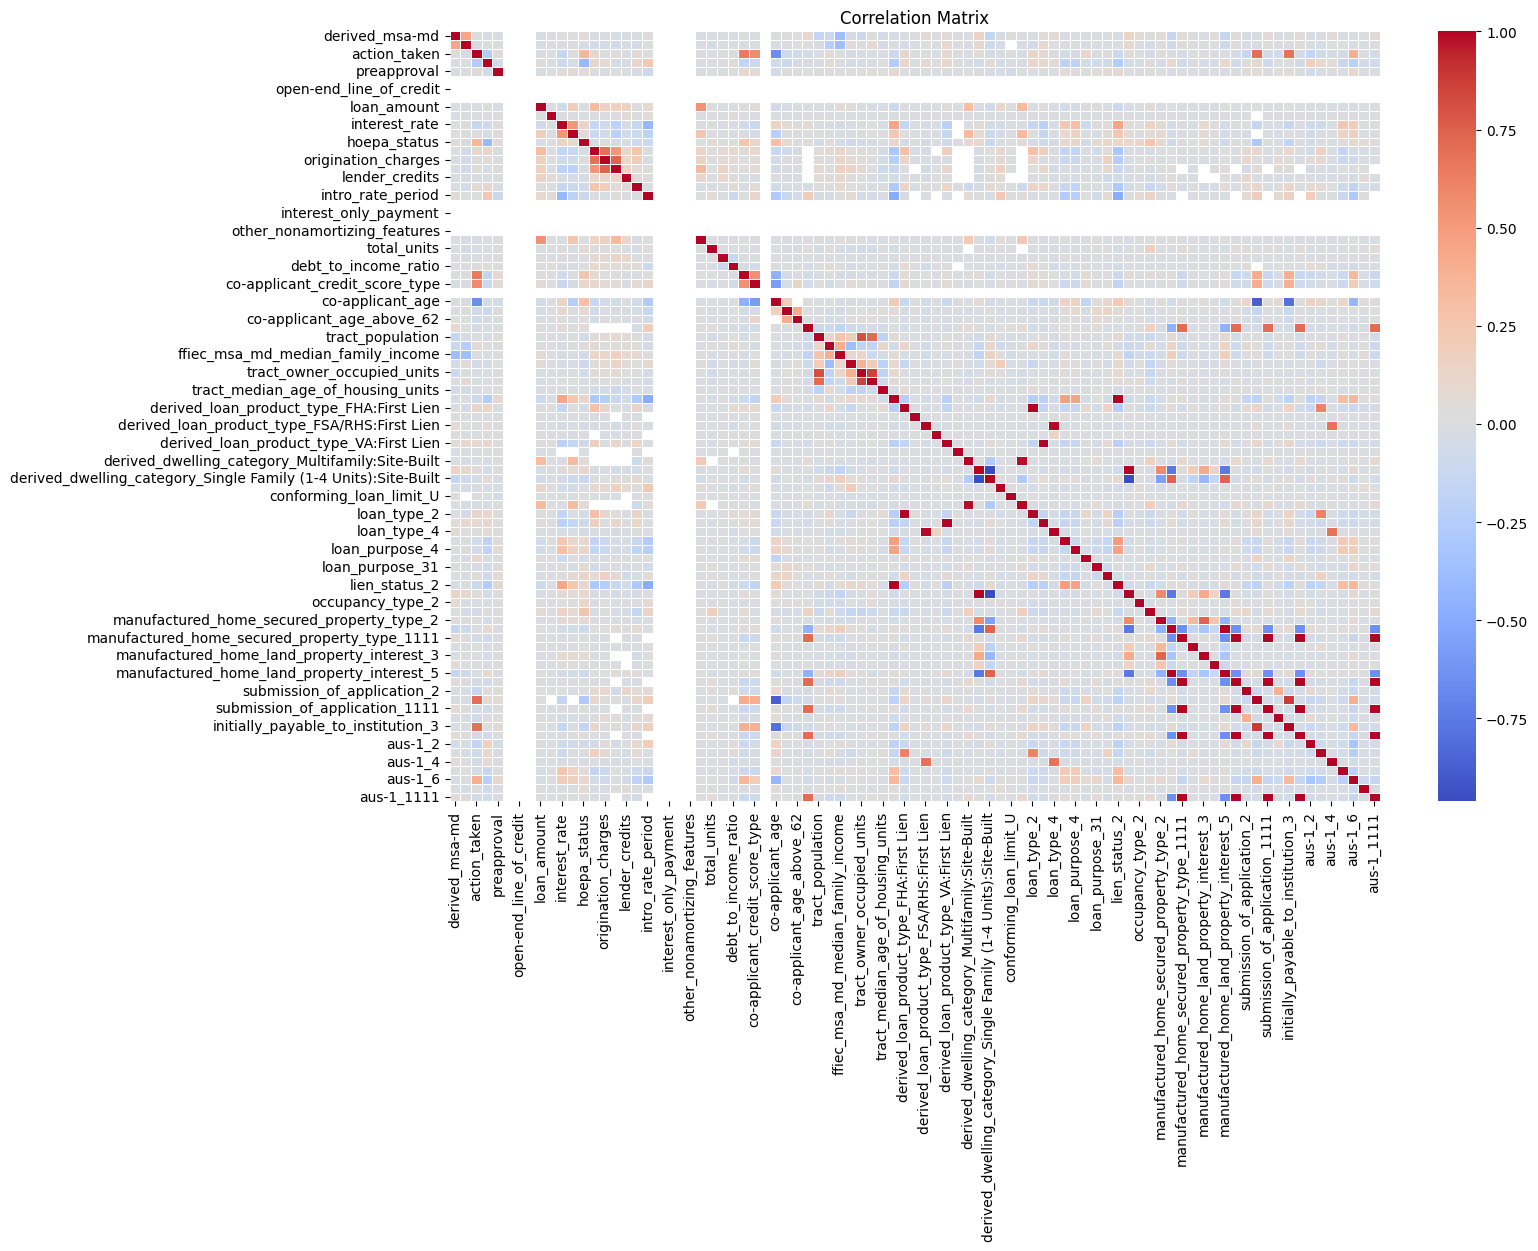

In [ ]:
# Replace 'Exempt' or any non-numeric values with NaN
df_encoded.replace("Exempt", float("nan"), inplace=True)

# Convert all possible columns to numeric (coercing errors to NaN)
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix (only for numeric columns)
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**1. Strong Positive Correlations (Red Squares)
Loan Amount & Property Value:**

Higher property values are associated with higher loan amounts.
This makes sense, as larger loans are typically required for more expensive properties.
Interest Rate & Rate Spread:

A strong correlation exists, indicating that rate spread increases as the interest rate rises.
Rate spread measures how much higher the loan’s interest rate is compared to a benchmark, so this is expected.
Loan Purpose & Loan Type:

Certain loan purposes (e.g., home purchase vs. refinancing) are highly associated with specific loan types (e.g., conventional vs. government-backed loans).

**2. Strong Negative Correlations (Blue Squares)
Debt-to-Income Ratio & Applicant Credit Score Type:**

A higher debt-to-income ratio tends to be associated with lower credit scores.
This suggests that applicants with high debt burdens may have lower creditworthiness.
Action Taken & Denial Reasons:

The likelihood of loan approval (action taken) negatively correlates with denial reasons.
If a loan is denied due to risk factors, the applicant is classified as high risk, supporting your classification goal for Model 3.

**3. Potential Redundant Features
Some variables show near-perfect correlation, meaning they might be redundant:**

Different encodings of loan types, purposes, and secured property types suggest that some categories might be merged or simplified.
"aus-1" variables (Automated Underwriting System decisions) show strong correlations, possibly indicating that only one of them is needed.

**4. Weak or No Correlation
Some variables do not show strong correlations with others:**

Some "aus-1" encodings and demographic-related variables seem weakly related to financial features.
Open-end lines of credit and balloon payments show relatively low correlation with other key financial indicators.

In [ ]:
target_corr = df_encoded.corr()[["action_taken", "interest_rate", "denial_reason-1", "property_value"]]
print(target_corr.sort_values(by="action_taken", ascending=False))

                                    action_taken  interest_rate  \
action_taken                            1.000000      -0.142056   
submission_of_application_3             0.698663      -0.145094   
initially_payable_to_institution_3      0.682345      -0.144544   
applicant_credit_score_type             0.640418      -0.069611   
co-applicant_credit_score_type          0.576051      -0.114526   
...                                          ...            ...   
negative_amortization                        NaN            NaN   
interest_only_payment                        NaN            NaN   
balloon_payment                              NaN            NaN   
other_nonamortizing_features                 NaN            NaN   
applicant_age                                NaN            NaN   

                                    denial_reason-1  property_value  
action_taken                              -0.046114       -0.008575  
submission_of_application_3               -0.046669    

Next Steps
1. **Feature Selection**: Drop redundant variables to prevent multicollinearity in models.
2. **Standardization**: Normalize numerical variables with large value ranges before model training.
3. **Further EDA**: Check missing values and distributions for skewed data.

To-do:
1. Normalization of data
2. Selecting features model wise (some will be common between models, some not)(essentially have x1, x2, x3 and x4; also y1, y2, y3 and y4)